# Working with brainsight module

In [1]:
from pynetstim.brainsight import BrainsightProject, chunk_samples, plot_chunks
from pynetstim.plotting import plotting_points
from pynetstim.utils import clean_plot
from surfer import Brain
from mayavi import mlab 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

200116-18:43:38,355 nipype.utils INFO:
	 Running nipype version 1.3.1 (latest: 1.4.0)


## Brainsight project

In [2]:
subject = 'sub-82YZ'
base_dir = '/Users/ehsantadayon/Dropbox/Projects/Broad/projects/pynetstim/examples/working_with_brainsight_module'
freesurfer_dir = os.path.join(base_dir,'example_data/{subject}/freesurfer'.format(subject=subject))
project_dir = os.path.join(base_dir,'example_data/{subject}/pynetstim_output'.format(subject=subject))
brainsight_file = os.path.join(base_dir, 'example_data/{subject}/brainsight_raw/brainsight.txt'.format(subject=subject))

project = BrainsightProject(subject, freesurfer_dir = freesurfer_dir,
                      project_dir= project_dir, 
                      brainsight_file = brainsight_file,
                      overwrite='all')

project.summary(plot_pulses=False)

Target
Sample
Electrode
Planned
Session
head model exists!


#### samples and targets

In [3]:
targets = project.brainsight_targets
samples = project.brainsight_samples

In [4]:
print('## Target Names ##\n')
print(targets.name)

## Target Names ##

['L_LDLPFC' 'L_IPL' 'M1' 'V1_M1_1' 'V1_M1_2' 'V1_M1_3' 'V1_M1_4' 'V1_M1_5'
 'L_IPL_1' 'V1_M1_6' 'R_DLPFC' 'R_OCC' 'V2_M1_1' 'V2_M1_2' 'F_OCC'
 'F_RDLPFC' 'I_DAN' 'I_DMN' 'C_DAN' 'C_DMN' 'ICA-DAN' 'ICA-DMN' 'V3_M1_1'
 'v3_M1_2' 'V4_m1_1' 'v4_m1_2' 'v4_m1_3' 'v4_m1_4' 'v4_m1_5' 'V5_M1_1'
 'V5_M1_2' 'V5_M1_3' 'V5_M1_4' 'V5_M1_5' 'V6_m1_1' 'V6_m1_2']


In [5]:
### getting samples for L_DLPFC
ldlpfc_samples = samples.get_target_stims('C_DMN')
ldlpfc_samples.head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment,emg_channels
4250,Sample 464,Session 3,464,C_DMN,63.998,-54.106,63.142,0.311,-0.160,-0.937,...,2.768,11.051,(null),2018-08-10,10:08:06.596,TTL2,Snazzy Coil,0.0,(null),(null)
4251,Sample 465,Session 3,465,C_DMN,67.717,-52.013,59.855,0.279,-0.143,-0.950,...,2.401,10.491,(null),2018-08-10,10:08:11.616,TTL2,Snazzy Coil,0.0,(null),(null)
4252,Sample 466,Session 3,466,C_DMN,66.340,-53.730,59.140,0.284,-0.133,-0.949,...,3.640,11.104,(null),2018-08-10,10:08:15.649,TTL2,Snazzy Coil,0.0,(null),(null)
4253,Sample 467,Session 3,467,C_DMN,68.362,-51.734,58.109,0.295,-0.157,-0.943,...,3.253,10.523,(null),2018-08-10,10:08:18.666,TTL2,Snazzy Coil,0.0,(null),(null)
4254,Sample 468,Session 3,468,C_DMN,66.543,-53.215,59.324,0.290,-0.149,-0.945,...,3.186,10.692,(null),2018-08-10,10:08:21.698,TTL2,Snazzy Coil,0.0,(null),(null)


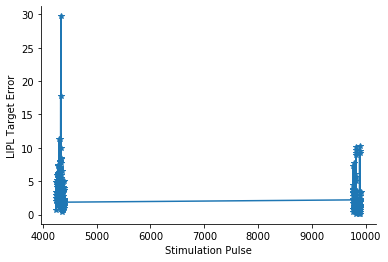

In [6]:
### plotting samples target errors
fig,ax = plt.subplots()
ax.plot(ldlpfc_samples.target_error,'*-')
ax.set_xlabel('Stimulation Pulse')
ax.set_ylabel('LIPL Target Error')
fig,ax  = clean_plot(fig,ax)

As the jumps in the plot shows, LDLPFC has been stimulated at different sessions. We can chunk the samples. 

[0, 150, 221, 294]


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1110b6dd8>)

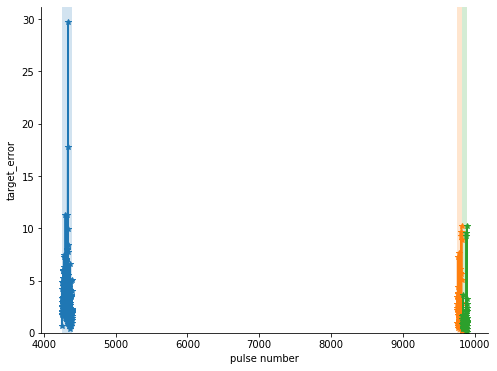

In [7]:
chunks = chunk_samples(ldlpfc_samples, thr=50)
plot_chunks(chunks)

## visualization of stimulations

In [8]:
targets.name

array(['L_LDLPFC', 'L_IPL', 'M1', 'V1_M1_1', 'V1_M1_2', 'V1_M1_3',
       'V1_M1_4', 'V1_M1_5', 'L_IPL_1', 'V1_M1_6', 'R_DLPFC', 'R_OCC',
       'V2_M1_1', 'V2_M1_2', 'F_OCC', 'F_RDLPFC', 'I_DAN', 'I_DMN',
       'C_DAN', 'C_DMN', 'ICA-DAN', 'ICA-DMN', 'V3_M1_1', 'v3_M1_2',
       'V4_m1_1', 'v4_m1_2', 'v4_m1_3', 'v4_m1_4', 'v4_m1_5', 'V5_M1_1',
       'V5_M1_2', 'V5_M1_3', 'V5_M1_4', 'V5_M1_5', 'V6_m1_1', 'V6_m1_2'],
      dtype=object)

In [9]:
names_to_plot = ['L_IPL','M1','C_DAN','C_DMN','ICA-DMN','ICA-DAN']


### subseting targets based on name 
targets_to_plot = targets.subset('name',names_to_plot)

In [15]:
p = plotting_points(targets_to_plot,hemi='both',surf='white',map_surface='pial',
                show_roi=True,show_name=True,scale_factor=0.5,name_scale=4,
               opacity=1,annot='Yeo2011_7Networks_N1000')
p.brain.save_imageset('sample_',views=['dor','med','lat'])

['sample__dor.png', 'sample__med.png', 'sample__lat.png']

![title](sample__dor.png)

In [16]:
p.show()